# Cross-correlation

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from synthesizAR.analysis import cross_correlation

%matplotlib inline

In [3]:
def gaussian_pulse(x,x0,sigma):
    return np.exp(-(x - x0)**2/(2*sigma**2))

In [60]:
t = np.linspace(0,1,10000)*u.s

In [75]:
f1 = gaussian_pulse(t,0.3*u.s,0.05*u.s)
f2 = gaussian_pulse(t,0.7*u.s,0.05*u.s)

In [76]:
lag,cc = cross_correlation(t,f1,f2)

(-0.4, 1)

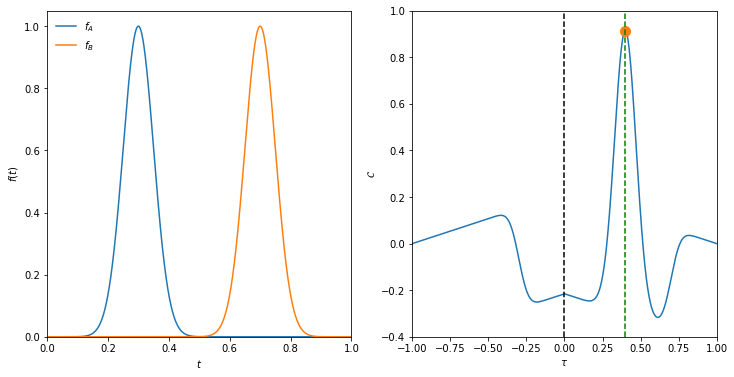

In [92]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
axes[0].plot(t,f1,label='$f_A$')
axes[0].plot(t,f2,label='$f_B$')
axes[0].legend(loc=2,frameon=False)
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,1.05)
axes[0].set_xlabel(r'$t$')
axes[0].set_ylabel(r'$f(t)$')
axes[1].plot(lag,cc)
axes[1].plot(lag[np.argmax(cc)],np.max(cc),markersize=10,marker='o')
axes[1].axvline(x=0,ls='--',color='k')
axes[1].axvline(x=0.4,ls='--',color='g')
axes[1].set_xlabel(r'$\tau$')
axes[1].set_ylabel(r'$\mathcal{C}$')
axes[1].set_xlim(-1,1)
axes[1].set_ylim(-0.4,1)